<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Auto_Summary_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade google-generativeai --quiet

In [2]:
# --- Ensure input.txt exists ---

import os

input_path = "input.txt"

if not os.path.exists(input_path):
    sample_text = """Artificial intelligence (AI) is rapidly transforming many industries, from healthcare to finance. By leveraging machine learning algorithms, AI systems can analyze large amounts of data, detect patterns, and make predictions more efficiently than humans."""

    with open(input_path, "w", encoding="utf-8") as f:
        f.write(sample_text)

    print(f"✅ Created placeholder file: {input_path}")
else:
    print(f"✅ {input_path} already exists")

✅ input.txt already exists


✅ Step 1 — Setup & Imports

In [3]:
# Install the Gemini client library (skip if already installed)
!pip install -q google-generativeai

import google.generativeai as genai

print("✅ Gemini Auto-Summary Notebook Initialized")

✅ Gemini Auto-Summary Notebook Initialized


✅ Step 2 — Configure API & Load Text File

In [4]:
# Step 2: Configure API & Load Text File

import getpass

# 1️⃣ Safely input your API key without exposing it in the notebook
api_key = getpass.getpass("Enter your Gemini API key: ")
genai.configure(api_key=api_key)

# 2️⃣ Helper: Load text from a file (auto-creates if missing)
def load_text_file(filename="input.txt"):
    """
    Reads the content of a text file and returns it as a string.
    If the file does not exist, creates a sample input file.
    """
    if not os.path.exists(filename):
        sample_text = (
            "This is a sample text to demonstrate the auto-summary script. "
            "You can replace this with your own text in input.txt."
        )
        with open(filename, "w", encoding="utf-8") as f:
            f.write(sample_text)
        print(f"⚠️ '{filename}' not found. A sample file has been created.")

    with open(filename, "r", encoding="utf-8") as f:
        return f.read()

# Example usage
text_content = load_text_file("input.txt")
print("Loaded text (first 500 chars):")
print(text_content[:500])


Enter your Gemini API key: ··········
Loaded text (first 500 chars):
Artificial intelligence (AI) is rapidly transforming many industries, from healthcare to finance. By leveraging machine learning algorithms, AI systems can analyze large amounts of data, detect patterns, and make predictions more efficiently than humans. In healthcare, AI assists doctors in diagnosing diseases, personalizing treatments, and even predicting patient outcomes. In finance, AI helps detect fraudulent transactions, optimize investment strategies, and automate customer service.

Despit


✅ Step 3 — Generate Summary with Gemini

In [5]:
def generate_summary(text, model_name="gemini-2.5-flash", max_output_tokens=200):
    """
    Sends input text to Gemini and returns a concise summary.
    """
    if not text.strip():
        return "⚠️ No text provided to summarize."

    response = genai.generate_content(
        model=model_name,
        prompt=f"Summarize the following text in a concise paragraph:\n\n{text}",
        max_output_tokens=max_output_tokens
    )

    # The text content is stored here
    summary = response.output[0].content[0].text
    return summary


✅ Step 4 — Save Summary to File

In [6]:
def save_summary_to_file(summary_text, output_filename="output_summary.txt"):
    """
    Saves the summary text to a file.

    Parameters:
    - summary_text: str, the text to save
    - output_filename: str, the file name for the output
    """
    with open(output_filename, "w", encoding="utf-8") as f:
        f.write(summary_text)

    print(f"✅ Summary saved to {output_filename}")

# Example usage:
# save_summary_to_file(summary_text)

Once this is done, your auto-summary pipeline is fully functional:

1. Load a text file

2. Generate a summary with Gemini

3. Save the summary to a new file

✅ Step 5 — Run the Auto-Summary Pipeline

In [7]:
# Step 5: Generate Auto-Summary with Gemini (WORKING)

def generate_summary(text):
    """
    Sends text to Gemini and returns a concise summary.
    """
    model = genai.GenerativeModel("gemini-2.5-flash")

    prompt = f"""
    Summarize the following text in clear, concise bullet points:

    {text}
    """

    response = model.generate_content(prompt)
    return response.text


# ---- Run it ----
try:
    text_content = load_text_file("input.txt")
    summary = generate_summary(text_content)
    print("📌 Summary:\n")
    print(summary)
except Exception as e:
    print(f"❌ Error: {e}")


📌 Summary:

Here's a summary of the text in clear, concise bullet points:

*   Artificial intelligence (AI) is rapidly transforming various industries (e.g., healthcare, finance).
*   It leverages machine learning to analyze large datasets, detect patterns, and make predictions more efficiently than humans.
*   **Key Applications:**
    *   **In healthcare:** Aids diagnosis, personalizes treatments, and predicts patient outcomes.
    *   **In finance:** Detects fraud, optimizes investments, and automates customer service.
*   However, AI raises significant ethical concerns, including data privacy, algorithmic bias, and potential job displacement.
*   Researchers and policymakers are developing guidelines and regulations for responsible and equitable AI deployment.
*   Overall, AI offers immense potential to improve lives but requires thoughtful implementation considering both technical and societal aspects.


After running this:

- Drop any text into input.txt

- Run this cell → output_summary.txt is created automatically

- You get a preview printed in the notebook

Screenshots

### Step 2: Configure API & Load Text File

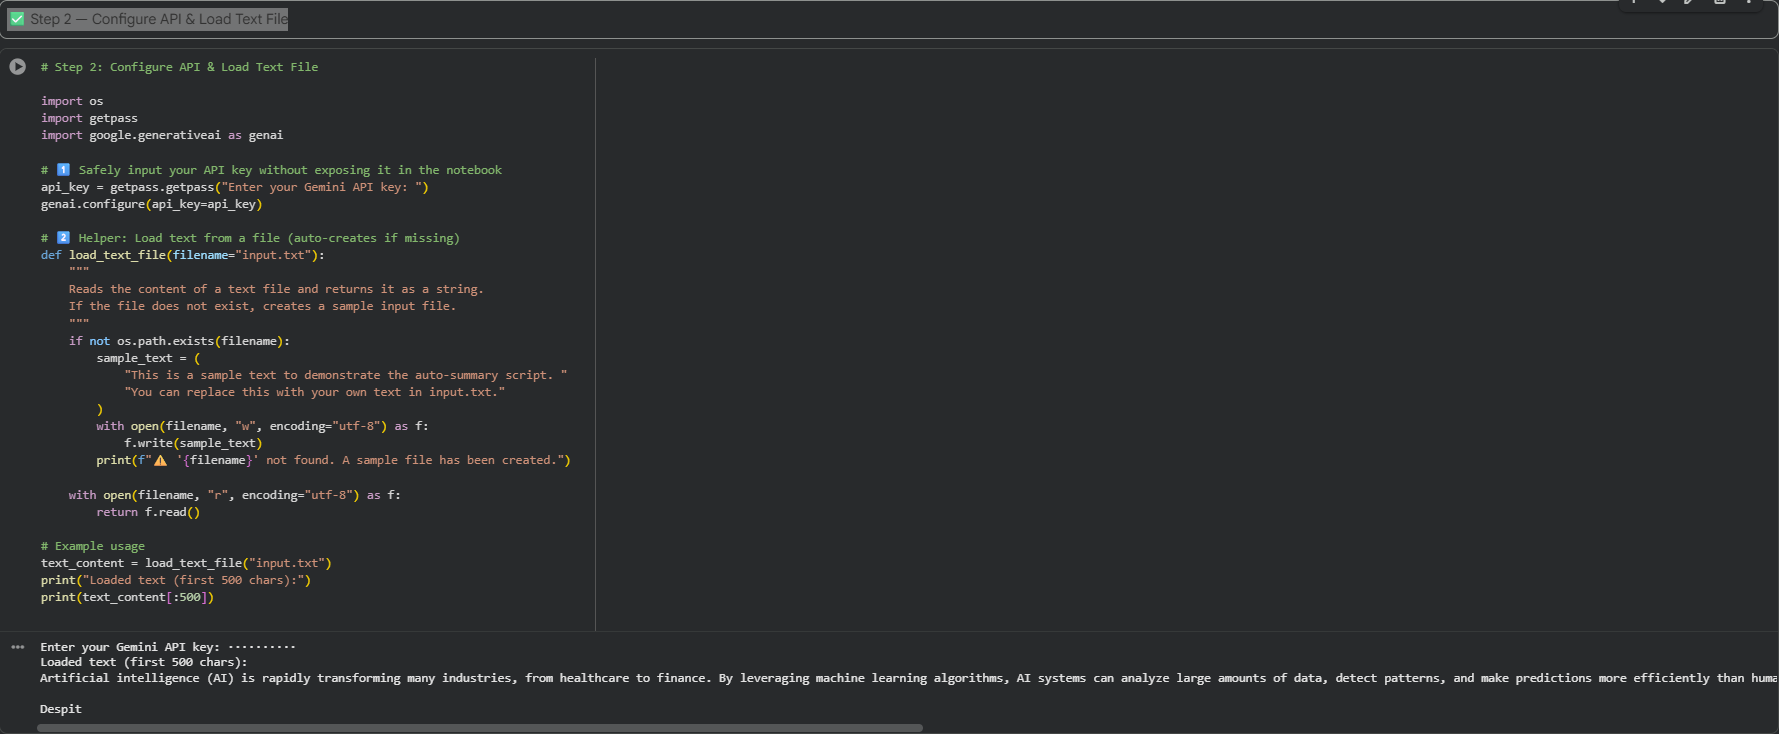

### Step 5: Run the Auto-Summary Pipeline

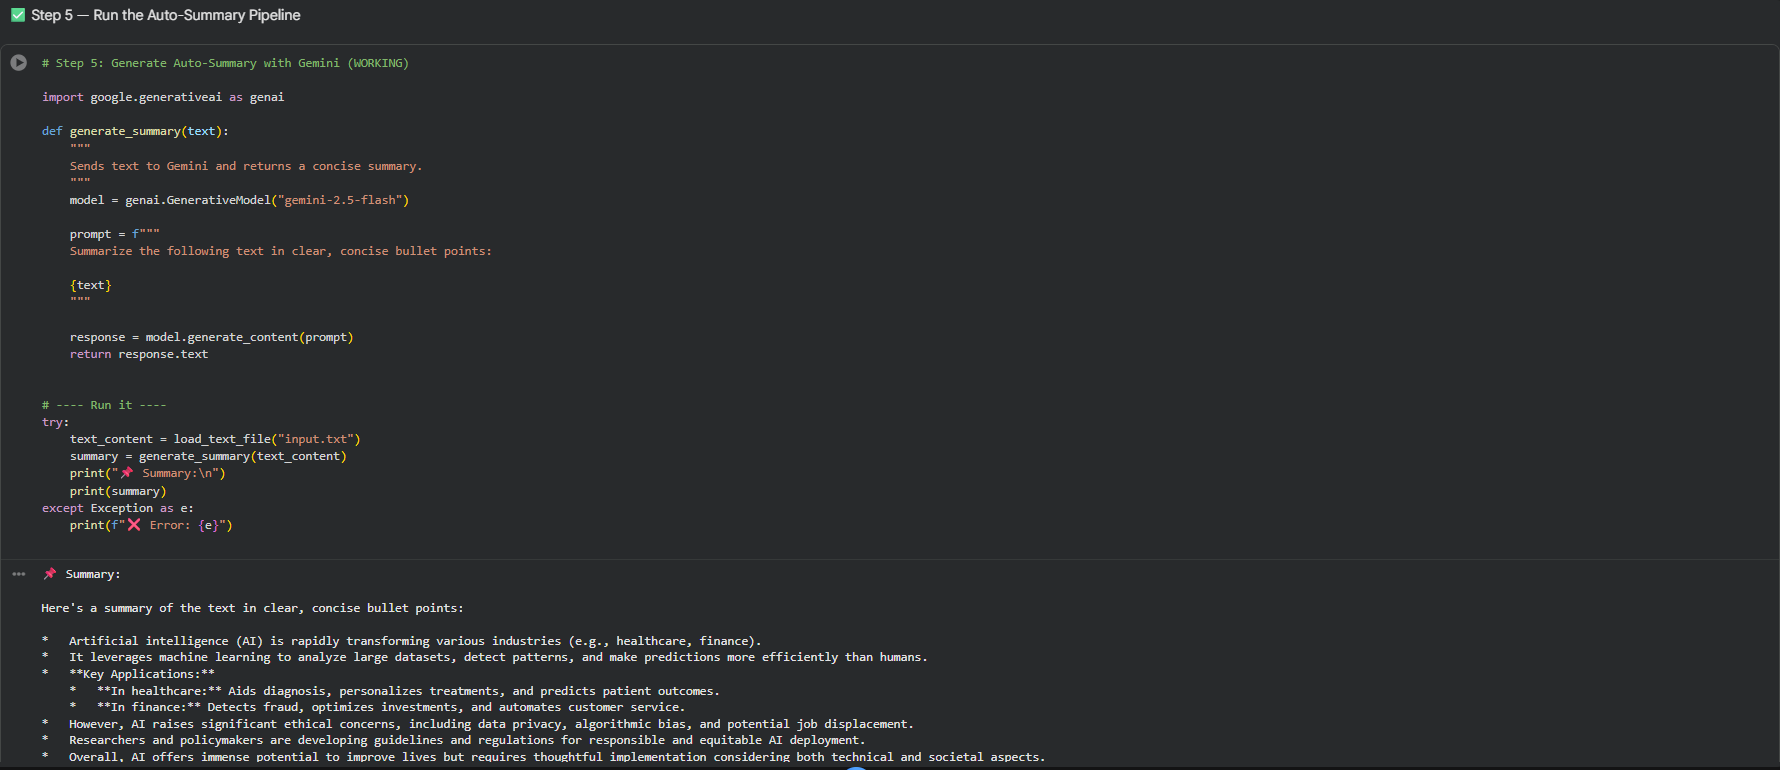

In [8]:
from IPython.display import Image, display, Markdown

SCREENSHOT_DIR = "/content/screenshots"

def show_screenshot(filename, title):
    path = os.path.join(SCREENSHOT_DIR, filename)
    if not os.path.exists(path):
        print(f"⚠️ Screenshot not found: {path}")
        return
    display(Markdown(f"### {title}"))
    display(Image(filename=path))

# Display portfolio screenshots
show_screenshot(
    "Step 2 - Configure API & Load Text File.png",
    "Step 2: Configure API & Load Text File"
)

show_screenshot(
    "Step 5 - Run the Auto-Summary Pipeline.png",
    "Step 5: Run the Auto-Summary Pipeline"
)
